<a href="https://colab.research.google.com/github/BenShieh233/Learn_Python/blob/main/Final_Project_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, roc_curve, auc
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.impute import KNNImputer

# 2. Import datasets

In [223]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
# Check basic information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
# Count null values in each column
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# 3. Data processing

In [224]:
df = train
y = df.pop("Transported")

In [225]:
# Split the cabin number variable into three variables, deck, number, and side.
def CabinSplit(df):
    df["Deck"] = df["Cabin"].str.split("/").str[0]
    df["Num"] = list(map(float, df["Cabin"].str.split("/").str[1]))
    df["Side"] = df["Cabin"].str.split("/").str[2]
    df = df.drop(["Cabin", "PassengerId", "Name"], axis=1)
    return df

In [226]:
df = CabinSplit(df)

In [227]:
# Define null values filling function, modes for categorical variables and KNN for numerical inputs.
def Fillna(df):
  mode = ['HomePlanet','CryoSleep','Destination','VIP','Side','Deck',]
  knn_impute = ["Age","RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Num"]
  X = np.array(df[knn_impute].values.tolist())
  imputer = KNNImputer(n_neighbors=10)
  X = imputer.fit_transform(X)
  df1 = pd.DataFrame(X, columns=knn_impute)
  df2 = df[mode].fillna(df.mode().iloc[0])
  df = pd.concat([df2,df1],axis=1)
  return df
  

In [228]:
df = Fillna(df)

In [229]:
# Transform the boolean values into numerical values
def Transform_Bool(df):
  for column in ['CryoSleep','VIP']:
      df[column] = [0 if i==False else 1 for i in df[column]]
  return df

In [230]:
df = Transform_Bool(df)

In [237]:
# Transform the splitted categorical variables into numerical values by introducing dummy variables.
def Get_Dummies(df):
  for column in ['HomePlanet','Destination','Side','Deck']:
    df1 = pd.get_dummies(df[column])
    df = pd.concat([df, df1], axis=1)
  df = df.drop(columns=['HomePlanet','Destination','Side','Deck'], axis=1)
  return df

In [238]:
# Generate heatmap for correlations
df = Get_Dummies(df)

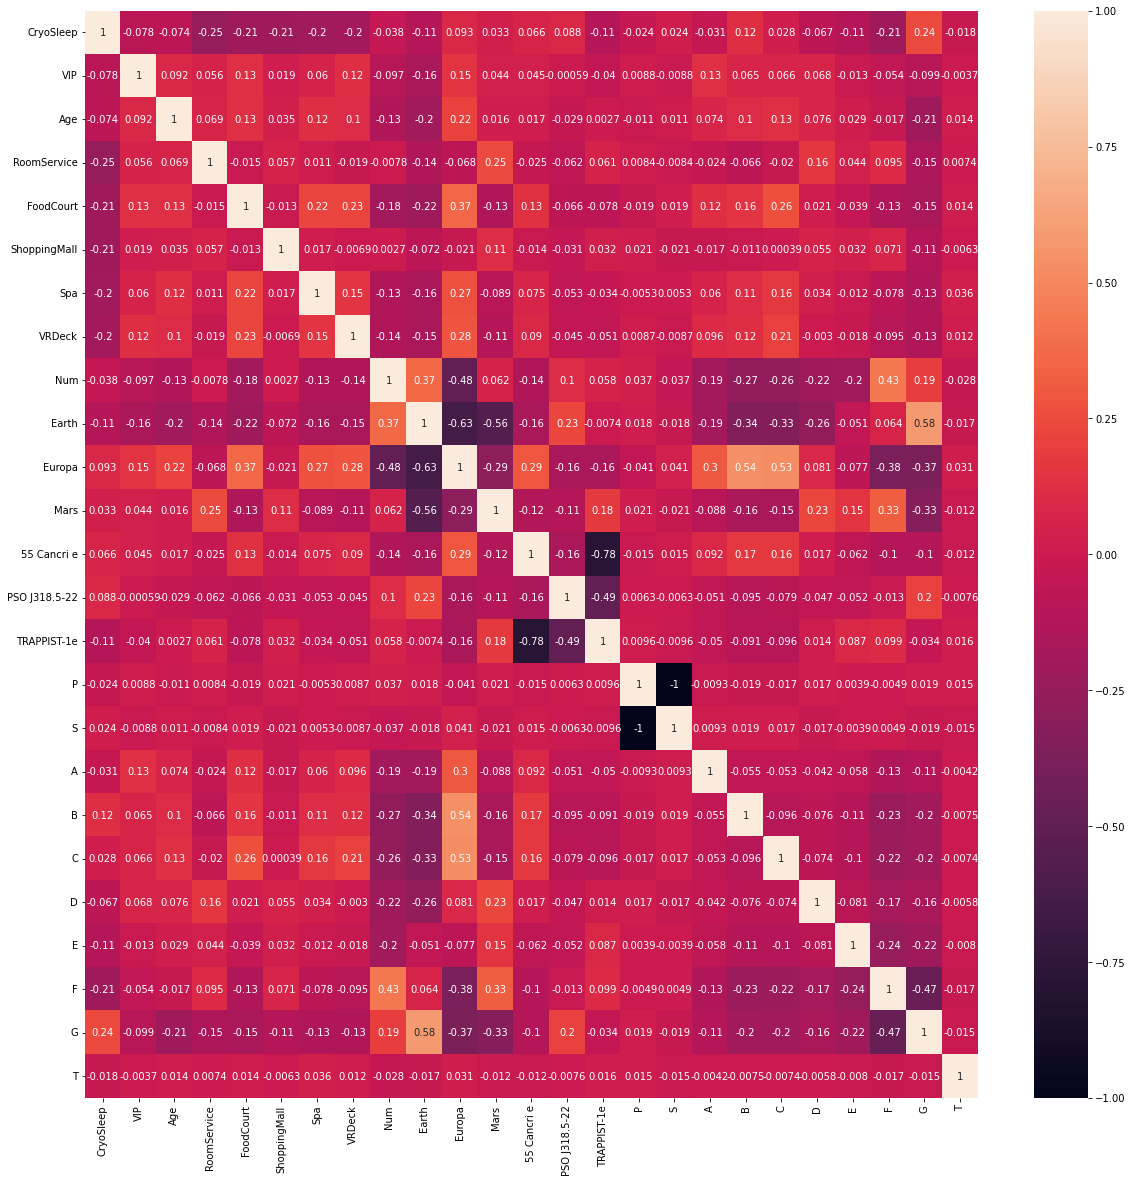

In [242]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

In [247]:
y = np.array([0 if i==False else 1 for i in y])

In [343]:
X = df.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [381]:
df.head(10)

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Earth,...,P,S,A,B,C,D,E,F,G,T
0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,0,1,0,0,0,0,0,1,0,0
5,0,0,44.0,0.0,483.0,0.0,291.0,0.0,0.0,1,...,1,0,0,0,0,0,0,1,0,0
6,0,0,26.0,42.0,1539.0,3.0,0.0,0.0,2.0,1,...,0,1,0,0,0,0,0,1,0,0
7,1,0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,35.0,0.0,785.0,17.0,216.0,0.0,3.0,1,...,0,1,0,0,0,0,0,1,0,0
9,1,0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,1,0,0,1,0,0,0,0,0,0


In [382]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1.0,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,F,0.0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,F,2.0,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,G,0.0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,F,3.0,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,B,1.0,P


# Single-Layer Neural Network

In [379]:
inputs = keras.Input(shape=(25,))
x = layers.Dense(12, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(1, activation = "sigmoid", name = "predictions")(x)
transported_nnet = keras.Model(inputs=inputs, outputs=outputs)
transported_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [380]:
transported = transported_nnet.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=25
)

Epoch 1/25
6085/6085 [==============================] - 11s 2ms/step - loss: 8.1509 - accuracy: 0.6966
Epoch 2/25
6085/6085 [==============================] - 11s 2ms/step - loss: 3.2661 - accuracy: 0.7320
Epoch 3/25
6085/6085 [==============================] - 11s 2ms/step - loss: 2.7038 - accuracy: 0.7279
Epoch 4/25
6085/6085 [==============================] - 11s 2ms/step - loss: 2.2093 - accuracy: 0.7376
Epoch 5/25
6085/6085 [==============================] - 11s 2ms/step - loss: 2.0110 - accuracy: 0.7303
Epoch 6/25
6085/6085 [==============================] - 11s 2ms/step - loss: 1.5699 - accuracy: 0.7443
Epoch 7/25
6085/6085 [==============================] - 11s 2ms/step - loss: 1.4019 - accuracy: 0.7399
Epoch 8/25
6085/6085 [==============================] - 11s 2ms/step - loss: 1.1133 - accuracy: 0.7385
Epoch 9/25
6085/6085 [==============================] - 11s 2ms/step - loss: 0.9734 - accuracy: 0.7425
Epoch 10/25
6085/6085 [==============================] - 12s 2ms/step - l

In [257]:
y_preds_neural = transported_nnet.predict(X_val)
y_preds_bin = y_preds_neural > 0.5
table = pd.DataFrame({'True':y_val,'pred':y_preds_bin.T[0]})
table.groupby(['True','pred']).size().unstack('True')

82/82 [==============================] - 0s 2ms/step


True,0,1
pred,,
False,1131,434
True,172,871


In [259]:
score = transported_nnet.evaluate(X_val, y_val, verbose = 1)
print(score)

82/82 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7676
[0.4586666226387024, 0.7676380276679993]


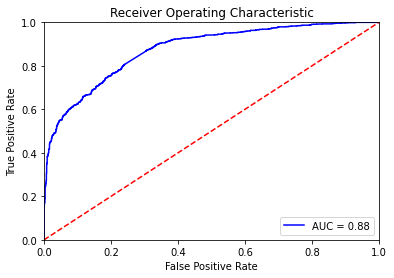

In [260]:
fpr, tpr, threshold = roc_curve(y_val, y_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Deep Learning

In [261]:
inputs_DL = keras.Input(shape=(25,))
x = layers.Dense(10, activation="relu", name="dense_1")(inputs_DL)
z = layers.Dense(5, activation="relu", name="dense_2")(x)
outputs_DL = layers.Dense(1, activation="sigmoid", name="predictions")(z)
transported_DL_nnet = keras.Model(inputs=inputs_DL, outputs=outputs_DL)
transported_DL_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [262]:
transported_2 = transported_DL_nnet.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=25,
    validation_split = 0.1
)

Epoch 1/25
5476/5476 [==============================] - 17s 3ms/step - loss: 3.6022 - accuracy: 0.7131 - val_loss: 0.9933 - val_accuracy: 0.7635
Epoch 2/25
5476/5476 [==============================] - 13s 2ms/step - loss: 0.8772 - accuracy: 0.7175 - val_loss: 0.6942 - val_accuracy: 0.7028
Epoch 3/25
5476/5476 [==============================] - 12s 2ms/step - loss: 0.6669 - accuracy: 0.7107 - val_loss: 0.6408 - val_accuracy: 0.7340
Epoch 4/25
5476/5476 [==============================] - 13s 2ms/step - loss: 0.5550 - accuracy: 0.7285 - val_loss: 0.5442 - val_accuracy: 0.7422
Epoch 5/25
5476/5476 [==============================] - 14s 3ms/step - loss: 0.5135 - accuracy: 0.7453 - val_loss: 0.4972 - val_accuracy: 0.7422
Epoch 6/25
5476/5476 [==============================] - 17s 3ms/step - loss: 0.5312 - accuracy: 0.7359 - val_loss: 0.5422 - val_accuracy: 0.7143
Epoch 7/25
5476/5476 [==============================] - 12s 2ms/step - loss: 0.5065 - accuracy: 0.7551 - val_loss: 0.4736 - val_ac

In [263]:
y_preds_2 = transported_DL_nnet.predict(X_val)
y_preds_2_bin = y_preds_2 > 0.5
table_2 = pd.DataFrame({'True':y_val,'pred':y_preds_2_bin.T[0]})
table_2.groupby(['True','pred']).size().unstack('True')

82/82 [==============================] - 0s 1ms/step


True,0,1
pred,,
False,961,209
True,342,1096


In [265]:
score_2 = transported_DL_nnet.evaluate(X_val, y_val, verbose = 1)
print (score_2)

82/82 [==============================] - 1s 9ms/step - loss: 0.4466 - accuracy: 0.7887
[0.4465687870979309, 0.7887269854545593]


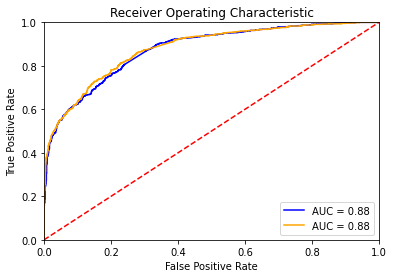

In [266]:
fpr2, tpr2, threshold = roc_curve(y_val, y_preds_2)
roc_auc2 = auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'orange', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [346]:
df_test = CabinSplit(test)
df_test = Fillna(df_test)
df_test = Transform_Bool(df_test)
df_test = Get_Dummies(df_test)

In [347]:
X_test = df_test.values

In [348]:
y_preds_3 = transported_nnet.predict(X_test)

134/134 [==============================] - 0s 1ms/step


In [349]:
y_preds_3

array([[5.5507797e-01],
       [2.3628166e-25],
       [8.1807661e-01],
       ...,
       [8.9918965e-01],
       [1.0000000e+00],
       [7.9374635e-01]], dtype=float32)

In [350]:
y_preds_3_bin = y_preds_3 > 0.5

In [351]:
y_list = y_preds_3_bin.tolist()

In [356]:
results = []
for i in range(len(y_list)):
  results.append(y_list[i][0])

In [327]:
results1 = [str(i).upper() for i in results]

In [358]:
test_table = pd.DataFrame({"Transported":results}, index=test['PassengerId'])

In [362]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Transported" : results})
submission.to_csv("submission.csv", index=False)

In [363]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [361]:
test_table.to_csv('results_1.csv')

# Random Forest & Boosting

In [308]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

In [309]:
rf = RandomForestRegressor(max_features=11, n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=11, n_estimators=500, random_state=1)

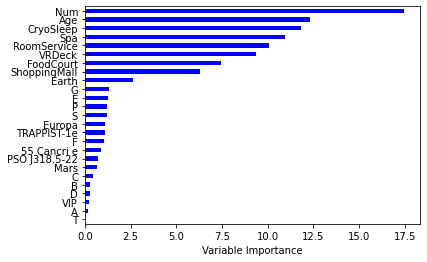

In [334]:
# Plot the importance of features during the model fitting
Importance_ = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=df.columns)
Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:25]
Importance.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [336]:
pred_rf = rf.predict(X_val)

In [389]:
# Confusion Matrix
y_pred = pred_rf > 0.5
table = pd.DataFrame({'Transported':y_val,'pred':y_pred})
table.groupby(['Transported','pred']).size().unstack('Transported')

Transported,0,1
pred,,
False,1063,273
True,240,1032


In [390]:
fpr3, tpr3, threshold = roc_curve(y_val, pred_rf)
roc_auc3 = auc(fpr3, tpr3)

# Boosted Tree Learner

In [338]:
boost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01,random_state=1)
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=5000, random_state=1)

CryoSleep        31.099106
Spa              11.392572
VRDeck            9.699782
RoomService       9.656551
Num               8.195711
FoodCourt         7.167657
Earth             5.525733
ShoppingMall      4.981385
Age               4.426498
E                 1.652521
G                 1.129111
S                 0.984808
Europa            0.984581
P                 0.771015
C                 0.472931
F                 0.406308
Mars              0.359763
TRAPPIST-1e       0.330957
PSO J318.5-22     0.250620
55 Cancri e       0.232590
VIP               0.100274
A                 0.073323
D                 0.055302
B                 0.050899
T                 0.000000
dtype: float64


Text(0.5, 0, 'Variable Importance')

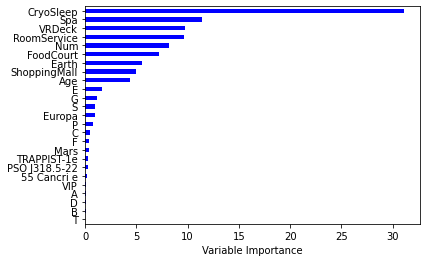

In [339]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=df.columns).sort_values(ascending=False, inplace=False)
rel_imp = rel_imp[0:25]
print(rel_imp)
rel_imp.plot(kind='barh', color='b', ).invert_yaxis()
plt.xlabel('Variable Importance')

In [388]:
pred_boost = boost.predict(X_val)
# Confusion Matrix
y_pred_boost = pred_boost > 0.5
table = pd.DataFrame({'Transported':y_val,'pred':y_pred_boost})
table.groupby(['Transported','pred']).size().unstack('Transported')

Transported,0,1
pred,,
False,1021,218
True,282,1087


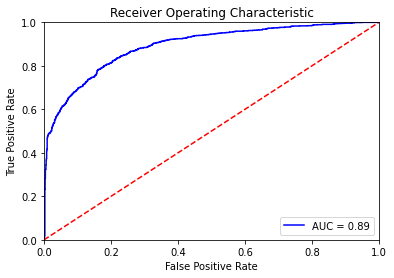

In [391]:
fpr4, tpr4, threshold = roc_curve(y_val, pred_boost)
roc_auc4 = auc(fpr4, tpr4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [385]:
len(X_val)

2608

In [394]:
pred_boost_test = boost.predict(X_test)
y_pred_boost_test = pred_boost_test > 0.5
y_list = y_pred_boost_test.tolist()

In [399]:
Tc = y_list.count(True)
Fc = y_list.count(False)

In [404]:
pd.DataFrame({'test':{'True':Tc,'False':Fc}})

,test
False,2010
True,2267


In [378]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Transported" : y_list})
submission.to_csv("submission.csv", index=False)

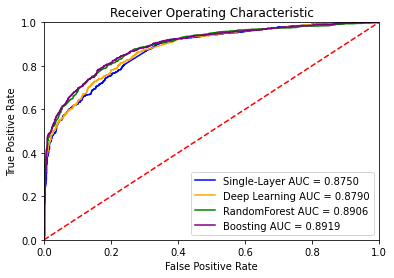

In [393]:
# Comparison of the four models
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Single-Layer AUC = %0.4f' % roc_auc)
plt.plot(fpr2, tpr2, 'orange', label = 'Deep Learning AUC = %0.4f' % roc_auc2)
plt.plot(fpr3, tpr3, 'green', label = 'RandomForest AUC = %0.4f'% roc_auc3)
plt.plot(fpr4, tpr4, 'purple', label = 'Boosting AUC = %0.4f'% roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()